In [ ]:
%pip install pandas
%pip install seaborn
%pip install joblib
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

In [15]:
import pandas as pd
import seaborn as sns
import os as os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import learning_curve, KFold, train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [41]:
# carichiamo i due dataframe che si serviranno per il confronto

df_down= joblib.load('dataframe_class_pos_down.joblib')
df_SMOTE= joblib.load('dataframe_class_pos_SMOTE.joblib')


In [59]:
# facciamo il confronto di tutti gli algo con il dataset SMOTE

X = df_SMOTE.drop('Categoria', axis=1)
y = df_SMOTE['Categoria']

# Suddivisione del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Modelli
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(learning_rate=1.0, n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42),
    "Logistic Regression": LogisticRegression(C=0.1, random_state=42),
    "Linear SVC": LinearSVC(C=1, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50), random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Creazione di una lista per memorizzare i risultati dell'accuracy
accuracy_results = []

# Esegui la k-fold cross-validation per ogni modello
for model_name, model in models.items():
    
    y_pred = cross_val_predict(model, X, y, cv=kf)

    # Calcola l'accuracy
    accuracy = accuracy_score(y, y_pred)

    # Aggiungi il risultato all lista
    accuracy_results.append({"Model": model_name, "Accuracy": accuracy})
 
# Stampa l'accuracy per ogni modello
for result in accuracy_results:
    model_name = result["Model"]
    accuracy = result["Accuracy"]
    print(f"Accuracy: --> {accuracy:.4f} for {model_name}. ")
 
# Se desideri salvare i risultati in un DataFrame pandas
accuracy_df = pd.DataFrame(accuracy_results)




[codecarbon INFO @ 12:08:34] [setup] RAM Tracking...
[codecarbon INFO @ 12:08:34] [setup] GPU Tracking...
[codecarbon INFO @ 12:08:34] Tracking Nvidia GPU via pynvml


NVMLError_NotSupported: Not Supported

In [64]:
# facciamo il confronto di tutti gli algo con il dataset downsampled


X = df_down.drop('Categoria', axis=1) 
y = df_down['Categoria']
# Suddivisione del dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Modelli
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(learning_rate=1.0, n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42),
    "Logistic Regression": LogisticRegression(C=0.1, random_state=42),
    "Linear SVC": LinearSVC(C=1, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50), random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Creazione di una lista per memorizzare i risultati dell'accuracy
accuracy_results = []

# Esegui la k-fold cross-validation per ogni modello
for model_name, model in models.items():
    # Calcola le predizioni durante la cross-validation
    y_pred = cross_val_predict(model, X, y, cv=kf)

    # Calcola l'accuracy
    accuracy = accuracy_score(y, y_pred)

    # Aggiungi il risultato all lista
    accuracy_results.append({"Model": model_name, "Accuracy": accuracy})
 
# Stampa l'accuracy per ogni modello
for result in accuracy_results:
    model_name = result["Model"]
    accuracy = result["Accuracy"]
    print(f"Accuracy: --> {accuracy:.4f} for {model_name}. ")
 
# Se desideri salvare i risultati in un DataFrame pandas
accuracy_df = pd.DataFrame(accuracy_results)

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Accuracy: --> 0.5560 for Decision Tree. 
Accuracy: --> 0.5952 for Random Forest. 
Accuracy: --> 0.5516 for AdaBoost. 
Accuracy: --> 0.5630 for Gradient Boosting. 
Accuracy: --> 0.5280 for Logistic Regression. 
Accuracy: --> 0.5162 for Linear SVC. 
Accuracy: --> 0.5124 for MLP Classifier. 
Accuracy: --> 0.5356 for Linear Discriminant Analysis. 
Accuracy: --> 0.5366 for Quadratic Discriminant Analysis. 


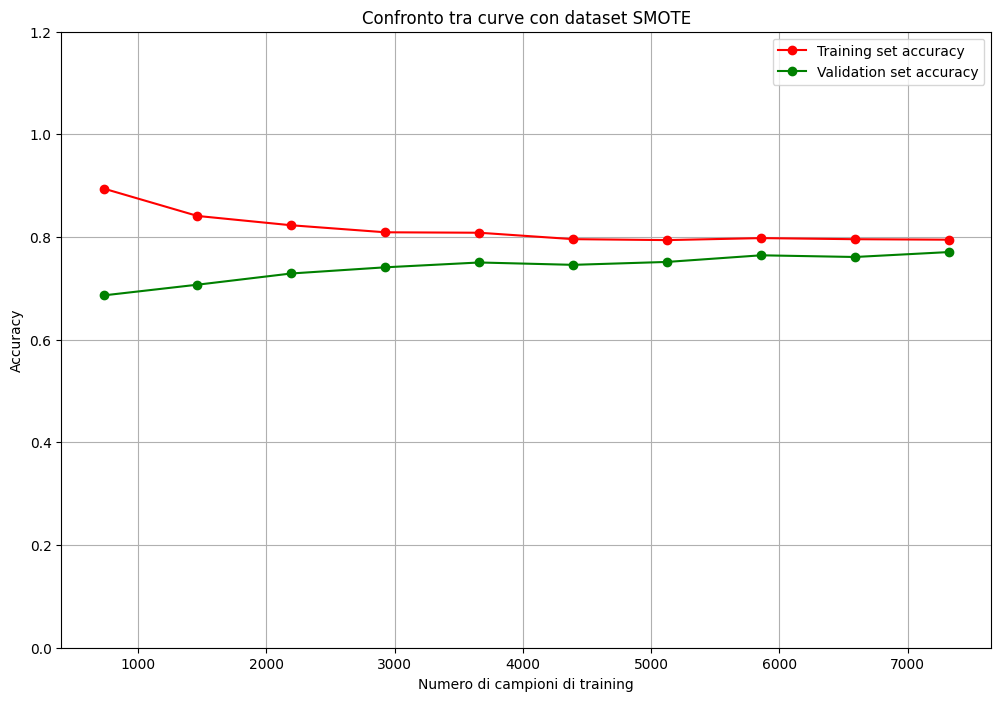

Accuracy sul Test Set: 0.77


In [45]:
# VALUTIAMO CURVE SUL DATASET SU CUI ABBIAMO FATTO SMOTE 

X = df_SMOTE.drop('Categoria', axis=1) 
y = df_SMOTE['Categoria']

# Suddivisione del dataset in training set (80%) e test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creazione del modello Random Forest
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42)

# Suddivisione dei dati di addestramento in 5 fold per la cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcola le curve di apprendimento
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=kf, scoring=make_scorer(accuracy_score),
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcola la media degli score di training e validation
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Addestramento finale sul dataset completo di addestramento
model.fit(X_train, y_train)

# Effettua le previsioni sul test set
y_pred_test = model.predict(X_test)

# Valutazione delle prestazioni del modello sul test set
accuracy_test = accuracy_score(y_test, y_pred_test)


# Plotta le curve di apprendimento
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training set accuracy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation set accuracy")

plt.title('Confronto tra curve con dataset SMOTE')
plt.xlabel('Numero di campioni di training')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()

plt.ylim(0, 1.2)

plt.show()

# Visualizza l'accuracy del test set
print(f'Accuracy sul Test Set: {accuracy_test:.2f}')

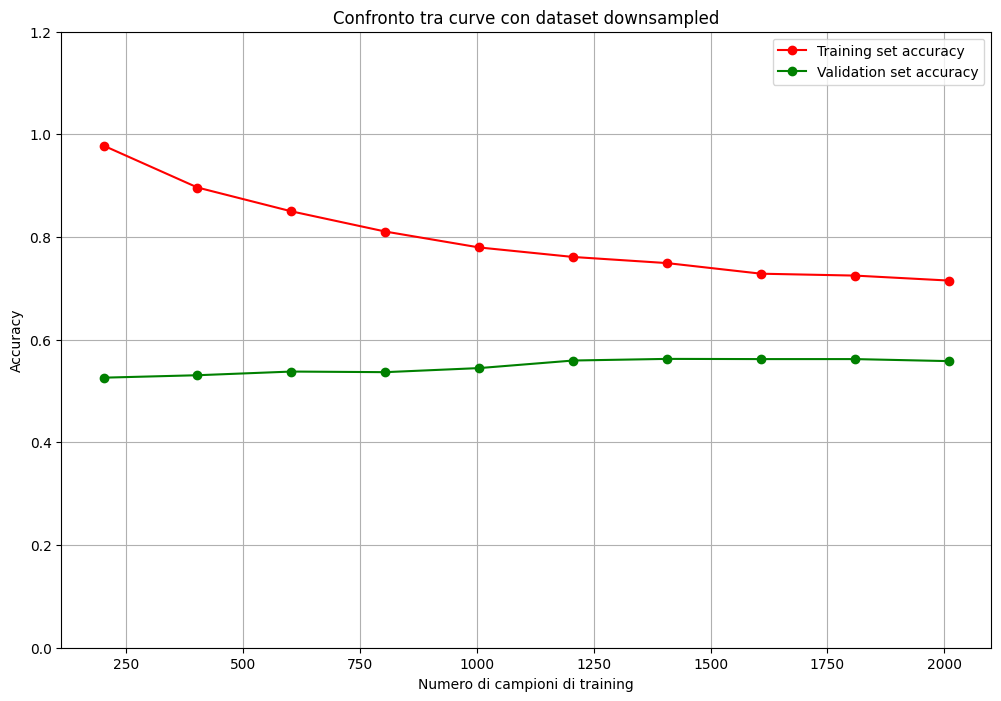

Accuracy sul Test Set: 0.57


In [47]:
# VALUTIAMO SUL DATASET SU CUI ABBIAMO FATTO DOWNSAMPLING

X = df_down.drop('Categoria', axis=1) 
y = df_down['Categoria']
# Suddivisione del dataset in training set (80%) e test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creazione del modello Random Forest
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42)

# Suddivisione dei dati di addestramento in 5 fold per la cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcola le curve di apprendimento
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=kf, scoring=make_scorer(accuracy_score),
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcola la media degli score di training e validation
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Addestramento finale sul dataset completo di addestramento
model.fit(X_train, y_train)

# Effettua le previsioni sul test set
y_pred_test = model.predict(X_test)

# Valutazione delle prestazioni del modello sul test set
accuracy_test = accuracy_score(y_test, y_pred_test)


# Plotta le curve di apprendimento
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training set accuracy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation set accuracy")

plt.title('Confronto tra curve con dataset downsampled')
plt.xlabel('Numero di campioni di training')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.grid()

plt.ylim(0, 1.2)

plt.show()

# Visualizza l'accuracy del test set
print(f'Accuracy sul Test Set: {accuracy_test:.2f}')

In [60]:
# FACCIAMO HYPERP TUNING SUGLI ALGORITMI SU DATASET DI SMOTE CHE HANNO OTTENUTO MAGGIORI VALORI DI ACCURACY


X = df_SMOTE.drop('Categoria', axis=1) 
y = df_SMOTE['Categoria']

# Suddivisione del dataset in training set (80%) e test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models_and_params = {
    "Random Forest": (RandomForestClassifier(), {
        'n_estimators': [50, 100, 150], 
        'max_depth': [5, 10, 20], 
        'min_samples_split': [2, 5, 10], 
        'min_samples_leaf': [1, 2, 4], 
        'criterion': ['gini', 'entropy']}),
    "Gradient Boosting": (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 150], 
        'learning_rate': [0.01, 0.1, 1.0], 
        'max_depth': [3, 5, 7], 
        'min_samples_split': [2, 5, 10], 
        'min_samples_leaf': [1, 2, 4]})
}

# Suddivisione dei dati di addestramento in 5 fold per la cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Esegui la k-fold cross-validation con ricerca degli iperparametri per ogni modello
for model_name, (model, param_grid) in models_and_params.items():
    grid_search = GridSearchCV(model, param_grid, cv=kf)
    grid_search.fit(X, y)
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} Best Cross-Validation Score: {grid_search.best_score_}\n")

Random Forest Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest Best Cross-Validation Score: 0.8183889123109307

Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Gradient Boosting Best Cross-Validation Score: 0.8250302449843734



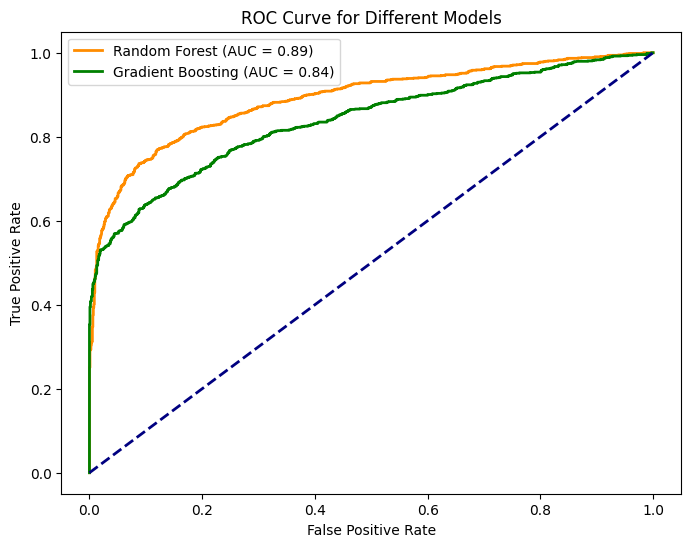

In [83]:
# stampiamo la ROC curve e la matrice di confusione

X = df_SMOTE.drop('Categoria', axis=1) 
y = df_SMOTE['Categoria']

# Creazione del modello Random Forest
models = {
    "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=20, criterion='entropy', min_samples_leaf=1, min_samples_split=2),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, min_samples_leaf=2, min_samples_split=5)
}

# Suddivisione del dataset in training set (80%) e test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Funzione per ottenere la ROC curve e l'area sotto la curva (AUC)
def plot_roc_curve(model, X_test, y_test, name, color):
    y_score = model.predict_proba(X_test)[:, 1]  # Probabilità della classe positiva
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})', color=color)

# Utilizzo per ogni modello
plt.figure(figsize=(8, 6))
colors = ['darkorange', 'green']  # Colori diversi per i due algoritmi
for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    plot_roc_curve(model, X_test, y_test, model_name, colors[i])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()
plt.show()


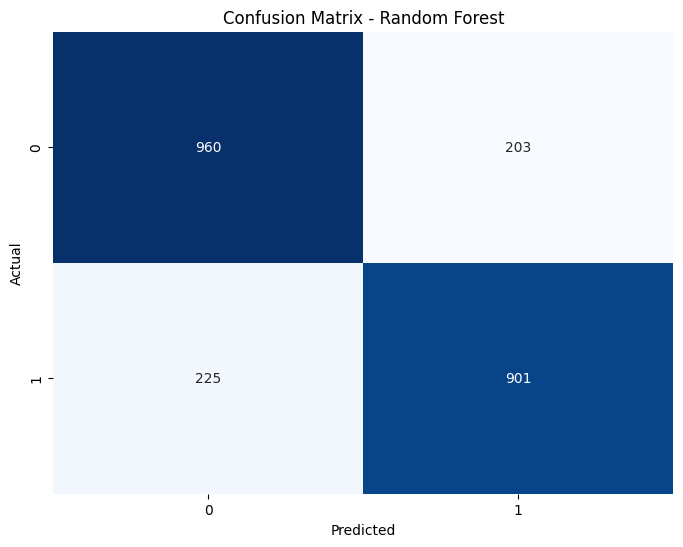

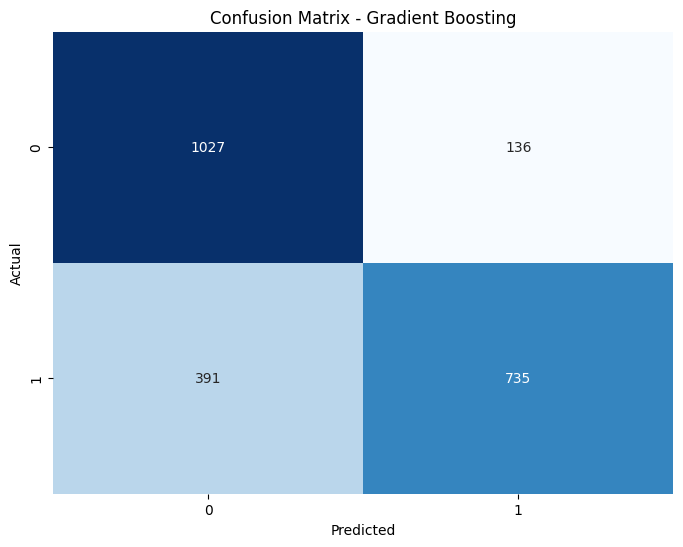

In [88]:
# qui andiamo a stampare le confusiuon matrix per gli algoritmi

X = df_SMOTE.drop('Categoria', axis=1) 
y = df_SMOTE['Categoria']


# Creazione del modello Random Forest
models = {
    "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=20, criterion='entropy', min_samples_leaf=1, min_samples_split=2),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, min_samples_leaf=2, min_samples_split=5)
}

# Suddivisione del dataset in training set (80%) e test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Funzione per visualizzare la matrice di confusione con una heatmap
def plot_confusion_matrix(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for model_name, model in models.items():
    model.fit(X_train, y_train)
    plot_confusion_matrix(model, X_test, y_test, model_name)

